In [85]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 

sns.set_theme()

from datetime import datetime, timedelta
from src.models import SimulateStatement, Model
from src.modelstats import ModelStats
from src.prob import ProbabilityAnalysis
from src.plots import plot_volatilities, plot_prob_evolution, plot_approval_prob_evolution
from dataclasses import dataclass
from src.crop import crop_statements_until_t_by_politician, crop_statements_until_t
from datetime import datetime
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from src.modelstats import ModelStats


data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

lambd = 0.1
delta = 0.01
lag = 14   # days

date_of_reckoning = datetime(2019,7,10)

probability_analysis = ProbabilityAnalysis(data_path, data_deputados_path)
probability_analysis = probability_analysis.get_timeframes(lag= lag, day_of_reckoning=date_of_reckoning)

ids = probability_analysis.get_politicians()
probability_analysis= probability_analysis.get_statement_volatility()
tau = probability_analysis.get_all_statements_per_politician(267)


Get High Statement Volatility Politicians Info:

In [72]:

high_volatility_ids = probability_analysis.get_high_statement_volatility_politicians()
from_id_to_name_high_vol, from_name_to_id_high_vol, high_volatility_politican_info = probability_analysis.get_high_statement_volatility_info()

In [77]:
len(high_volatility_ids)

28

Running Approval Probability Calculation - ALL  politicians


In [ ]:

from_politician_to_prob_time_series = {}

for id_politican in ids:
    
    from_time_cut_to_probability = probability_analysis.get_politician_probability_evolution(lambd, delta,  id_politico = id_politican )
    from_politician_to_prob_time_series[id_politican] = from_time_cut_to_probability

In [75]:
from_time_to_approval_prob = probability_analysis.calculate_approval_probability_for_each_timestamp(from_politician_to_prob_time_series, approval_threshold = 305)
from_time_to_approval_prob

{}

Running Approval Probability Calculation - High Volatility Politicians


In [76]:

from_politician_to_prob_time_series = {}

for id_politican in high_volatility_ids:
    
    from_time_cut_to_probability = probability_analysis.get_politician_probability_evolution(lambd, delta,  id_politico = id_politican )
    from_politician_to_prob_time_series[id_politican] = from_time_cut_to_probability

14it [00:08,  1.61it/s]
14it [00:08,  1.57it/s]
14it [00:09,  1.53it/s]
14it [00:09,  1.55it/s]
14it [00:08,  1.58it/s]
14it [00:08,  1.57it/s]
14it [00:08,  1.57it/s]
14it [00:09,  1.49it/s]
14it [00:09,  1.54it/s]
14it [00:08,  1.57it/s]
14it [00:08,  1.57it/s]
14it [00:08,  1.59it/s]
14it [00:09,  1.47it/s]
14it [00:10,  1.37it/s]
14it [00:08,  1.58it/s]
14it [00:09,  1.54it/s]
14it [00:09,  1.46it/s]
14it [00:09,  1.55it/s]
14it [00:09,  1.45it/s]
14it [00:09,  1.55it/s]
14it [00:08,  1.60it/s]
14it [00:08,  1.59it/s]
14it [00:08,  1.58it/s]
14it [00:08,  1.60it/s]
14it [00:08,  1.59it/s]
14it [00:08,  1.60it/s]
14it [00:08,  1.59it/s]
14it [00:08,  1.59it/s]


In [81]:
from_time_to_approval_prob = probability_analysis.calculate_approval_probability_for_each_timestamp(from_politician_to_prob_time_series, approval_threshold = 26)
from_time_to_approval_prob

list of voting in favor probabilities:  [0.27, 0.73, 0.7, 0.3, 0.85, 0.15, 0.07, 0.93, 0.1, 0.9, 1.0, 0.0, 1.0, 0.0, 0.03, 0.97, 0.95, 0.05, 0.11, 0.89, 0.94, 0.06, 0.0, 1.0, 0.08, 0.92, 0.26, 0.74, 0.89, 0.11, 0.96, 0.04, 0.99, 0.01, 0.03, 0.97, 0.0, 1.0, 0.24, 0.76, 0.26, 0.74, 0.81, 0.19, 0.05, 0.95, 0.16, 0.84, 0.78, 0.22, 0.25, 0.75, 0.7, 0.3, 0.83, 0.17]
list of voting in favor probabilities:  [0.27, 0.73, 0.73, 0.27, 0.87, 0.13, 0.06, 0.94, 0.09, 0.91, 1.0, 0.0, 0.98, 0.02, 0.2, 0.8, 0.95, 0.05, 0.1, 0.9, 0.87, 0.13, 0.01, 0.99, 0.17, 0.83, 0.23, 0.77, 0.9, 0.1, 0.93, 0.07, 0.97, 0.03, 0.02, 0.98, 0.04, 0.96, 0.26, 0.74, 0.33, 0.67, 0.83, 0.17, 0.05, 0.95, 0.17, 0.83, 0.78, 0.22, 0.25, 0.75, 0.7, 0.3, 0.84, 0.16]
list of voting in favor probabilities:  [0.27, 0.73, 0.76, 0.24, 0.88, 0.12, 0.07, 0.93, 0.08, 0.92, 1.0, 0.0, 0.98, 0.02, 0.37, 0.63, 0.95, 0.05, 0.09, 0.91, 0.87, 0.13, 0.01, 0.99, 0.25, 0.75, 0.22, 0.78, 0.91, 0.09, 0.93, 0.07, 0.97, 0.03, 0.02, 0.98, 0.04, 0.96, 0.2

{Timestamp('2019-04-23 17:36:46'): 0.8575034546840434,
 Timestamp('2019-05-07 17:36:46'): 0.8445561708996808,
 Timestamp('2019-05-21 17:36:46'): 0.840267660204863,
 Timestamp('2019-06-04 17:36:46'): 0.8334309265245724,
 Timestamp('2019-06-18 17:36:46'): 0.8271268682115749,
 Timestamp('2019-07-02 17:36:46'): 0.8182345903087709}

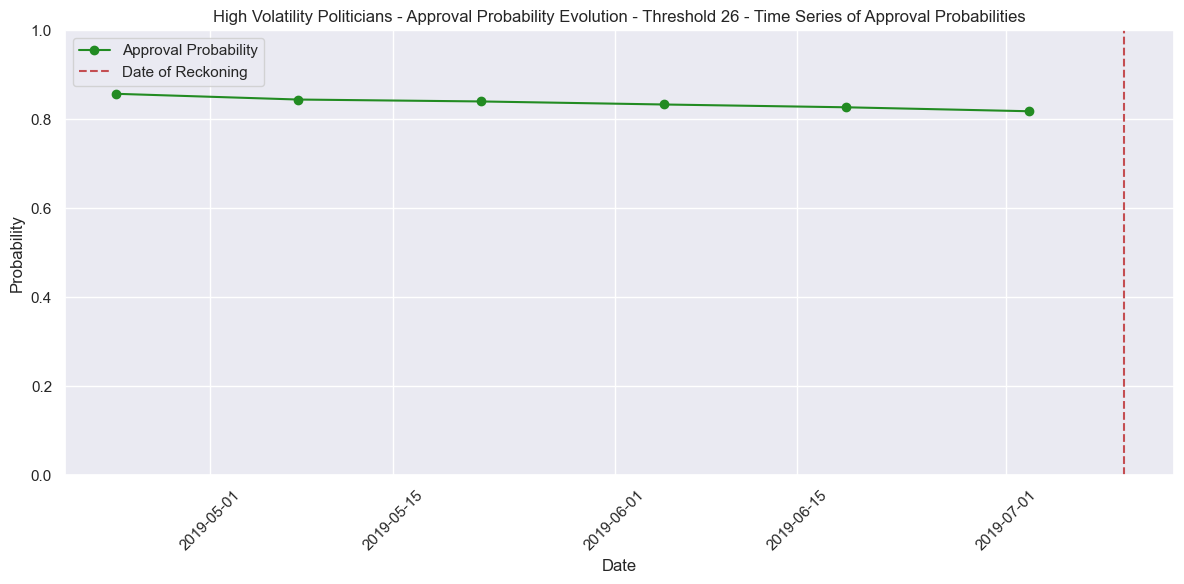

In [87]:
plot_approval_prob_evolution(from_time_to_approval_prob, date_of_reckoning, 'High Volatility Politicians - Approval Probability Evolution - Threshold 26')

Plotting Politician Vote Probability Evolution

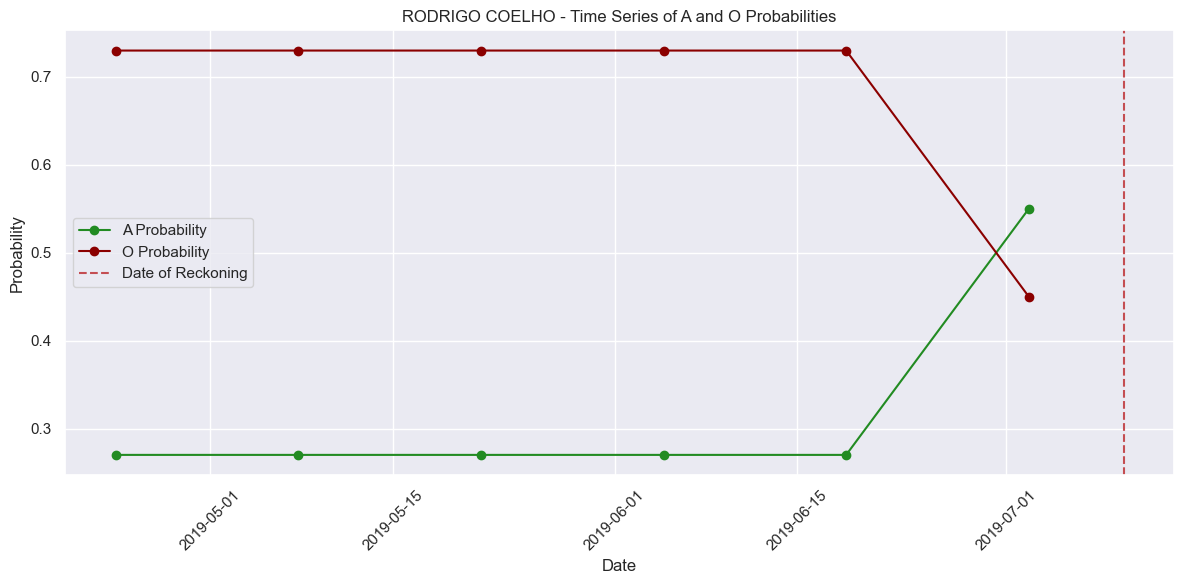

In [88]:

plot_prob_evolution(from_politician_to_prob_time_series[477], date_of_reckoning=date_of_reckoning, name = from_id_to_name_high_vol[428])